# Canadian ETF Selection 
## Data Analysis Using Python
<hr style="border:1px solid gray">

## Project Objective

The primary goal of this project is to analyze Canadian exchange-traded funds (ETF) that track the different sectors of the Toronto Stock Exchange (TSE) to find the ETF with the best potential based on both risk and return. The ETF's will be compared with each other as well as compared to the S&P/TSX Composite Index, which is the benchmark Canadian index that represents around 70% of the total market capitalization of the TSE. 

We will also look at how each sector ETF is correlated with this index, and how this can potentially affect any investment decisions.

## Data

The ETF and index data will be downloaded from Yahoo Finance using the yfinance Python library. The data will then be analyzed using Python.
<hr style="border:1px solid gray">

### Preliminaries


In [2]:
# Import packages required.
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

They all have .TO at the end\
XIU – tracks the S&P/TSX 60 Total Return Index - 60 large companies listed on the Toronto Stock Exchange\
XIC – tracks the S&P/TSX Capped Composite Index\
XMD – tracks the S&P/TSX MidCap Index\
XCS – tracks the S&P/TSX SmallCap Index\
XEG – tracks the S&P/TSX Capped Energy Index\
XIT – tracks the S&P/TSX Capped Information Technology Index\
XGD – tracks the S&P/TSX Capped Gold Index\
XFN – tracks the S&P/TSX Capped Financials Index\
XMA – tracks the S&P/TSX Capped Materials Index\
XRE – tracks the S&P/TSX Capped Real Estate Investment Trust Index\
XUT - tracks Capped Utilities Index ETF\
XST - tracks Capped Consumer Staples Index ETF

In [6]:
tickers = ['^GSPTSE', 'XIU.TO', 'XIC.TO', 'XMD.TO', 'XCS.TO', 'XEG.TO', 'XIT.TO', 'XGD.TO', 'XFN.TO', 'XMA.TO'\
           , 'XRE.TO', 'XUT.TO', 'XST.TO']

In [192]:
df = yf.download(tickers, start='2015-01-01')['Adj Close']

[*********************100%***********************]  13 of 13 completed


In [193]:
df = df.pct_change()

In [194]:
# Mean daily returns
df.mean().nlargest(len(df))

XIT.TO     0.000686
XGD.TO     0.000546
XEG.TO     0.000428
XMA.TO     0.000367
XST.TO     0.000366
XFN.TO     0.000354
XIU.TO     0.000324
XIC.TO     0.000309
XUT.TO     0.000309
XMD.TO     0.000259
XRE.TO     0.000246
XCS.TO     0.000217
^GSPTSE    0.000196
dtype: float64

In [195]:
# Standard deviation
df.std().nsmallest(len(df))

XST.TO     0.009567
XIC.TO     0.009787
^GSPTSE    0.009869
XIU.TO     0.009936
XMD.TO     0.010500
XFN.TO     0.010960
XUT.TO     0.011010
XRE.TO     0.011056
XCS.TO     0.012870
XIT.TO     0.015643
XMA.TO     0.016521
XGD.TO     0.022095
XEG.TO     0.022556
dtype: float64

In [196]:
# Sharpe ratio
(df.mean() / df.std()).nlargest(len(df))

XIT.TO     0.043876
XST.TO     0.038230
XIU.TO     0.032624
XFN.TO     0.032305
XIC.TO     0.031595
XUT.TO     0.028031
XGD.TO     0.024721
XMD.TO     0.024678
XRE.TO     0.022263
XMA.TO     0.022212
^GSPTSE    0.019904
XEG.TO     0.018994
XCS.TO     0.016892
dtype: float64

In [197]:
(df + 1).cumprod() - 1

,XCS.TO,XEG.TO,XFN.TO,XGD.TO,XIC.TO,XIT.TO,XIU.TO,XMA.TO,XMD.TO,XRE.TO,XST.TO,XUT.TO,^GSPTSE
Date,,,,,,,,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.008125,-0.064266,-0.021437,0.024390,-0.025674,-0.014617,-0.026292,-0.004938,-0.015715,0.010527,-0.018698,-0.001899,-0.024468
2015-01-06,-0.014895,-0.075565,-0.036255,0.085896,-0.034660,-0.028375,-0.034594,0.027984,-0.029363,0.021672,-0.044605,-0.008547,-0.034358
2015-01-07,-0.008802,-0.084040,-0.034048,0.071050,-0.032948,-0.022356,-0.031827,0.023869,-0.026055,0.052632,-0.031539,0.000475,-0.031768
2015-01-08,-0.013541,-0.067797,-0.029319,0.050902,-0.020967,-0.007739,-0.017989,0.024692,-0.019851,0.058205,-0.029061,0.004748,-0.020063
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-02,0.329311,0.380940,0.893302,0.913858,0.750610,2.475399,0.803334,0.635121,0.540923,0.484279,0.965317,0.717299,0.370382
2023-08-03,0.331523,0.403056,0.881269,0.908220,0.742453,2.426689,0.791605,0.624492,0.542899,0.480641,0.953457,0.672551,0.363773
2023-08-04,0.344794,0.415441,0.897866,0.936414,0.751698,2.393443,0.802161,0.644865,0.550310,0.488827,0.965791,0.694601,0.371588


In [198]:
((df + 1).cumprod() - 1).loc['2023-08-09'].nlargest(len(df))

XIT.TO     2.374114
XST.TO     0.994016
XGD.TO     0.921753
XFN.TO     0.885418
XIU.TO     0.808026
XIC.TO     0.756049
XUT.TO     0.706274
XMA.TO     0.644865
XMD.TO     0.550804
XRE.TO     0.487007
XEG.TO     0.443750
^GSPTSE    0.374250
XCS.TO     0.333734
Name: 2023-08-09 00:00:00, dtype: float64

### Findings: 

- XIT has the highest Sharpe ratio and cumulative returns, followed by XST (Capped Consumer Staples Index ETF)
- XGD (S&P/TSX Capped Gold Index) is consistently the most uncorrelated to market, except during critical events such as covid.
- For most correlated, the two ETF's are XIC and XIU, with XIU being the better investment in terms of Sharpe ratio, mean daily returns, and cumulated returns. XIC only a slightly less risk as seen from standard deviation. If wanting to track index, XIU is the one to choose.
- In critical events, all sectors head towards a correlation of one, meaning if there is a market crash, all sectors also crash. 

In [199]:
df.corr()

,XCS.TO,XEG.TO,XFN.TO,XGD.TO,XIC.TO,XIT.TO,XIU.TO,XMA.TO,XMD.TO,XRE.TO,XST.TO,XUT.TO,^GSPTSE
XCS.TO,1.000000,0.681385,0.614223,0.443343,0.803011,0.445212,0.748990,0.660248,0.880782,0.589128,0.355952,0.536807,0.802409
XEG.TO,0.681385,1.000000,0.612875,0.063915,0.714170,0.235949,0.700544,0.305236,0.677799,0.410051,0.247035,0.394636,0.715046
XFN.TO,0.614223,0.612875,1.000000,-0.030760,0.890852,0.462247,0.901945,0.226534,0.747294,0.636973,0.528753,0.651894,0.890233
XGD.TO,0.443343,0.063915,-0.030760,1.000000,0.227489,0.063040,0.186246,0.890779,0.313883,0.123472,0.026593,0.158105,0.227433
XIC.TO,0.803011,0.714170,0.890852,0.227489,1.000000,0.608600,0.990497,0.501217,0.891473,0.667090,0.586386,0.711328,0.996388
XIT.TO,0.445212,0.235949,0.462247,0.063040,0.608600,1.000000,0.600574,0.227471,0.536934,0.374970,0.407464,0.382014,0.606192
XIU.TO,0.748990,0.700544,0.901945,0.186246,0.990497,0.600574,1.000000,0.461037,0.844890,0.635005,0.597082,0.701190,0.990249
XMA.TO,0.660248,0.305236,0.226534,0.890779,0.501217,0.227471,0.461037,1.000000,0.559734,0.261700,0.165600,0.289891,0.501996
XMD.TO,0.880782,0.677799,0.747294,0.313883,0.891473,0.536934,0.844890,0.559734,1.000000,0.690900,0.480482,0.665525,0.894681
XRE.TO,0.589128,0.410051,0.636973,0.123472,0.667090,0.374970,0.635005,0.261700,0.690900,1.000000,0.453560,0.658497,0.668355


In [200]:
df.corr()['^GSPTSE'].nlargest(len(df))

^GSPTSE    1.000000
XIC.TO     0.996388
XIU.TO     0.990249
XMD.TO     0.894681
XFN.TO     0.890233
XCS.TO     0.802409
XEG.TO     0.715046
XUT.TO     0.714249
XRE.TO     0.668355
XIT.TO     0.606192
XST.TO     0.584649
XMA.TO     0.501996
XGD.TO     0.227433
Name: ^GSPTSE, dtype: float64

<AxesSubplot:>

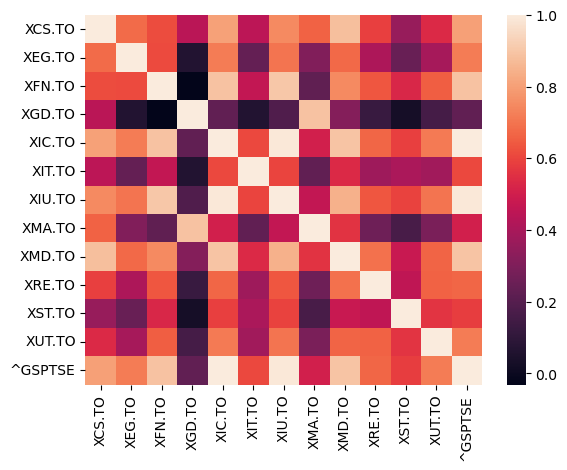

In [201]:
sns.heatmap(df.corr())

In [173]:
################################################################################### PRACTICE BELOW

In [202]:
# correlation matrix based on the last x days for each day
roll_corr = df.rolling(60).corr()

In [203]:
roll_corr

XCS.TO    XEG.TO    XFN.TO    XGD.TO    XIC.TO  \
Date                                                                   
2015-01-02 XCS.TO        NaN       NaN       NaN       NaN       NaN   
           XEG.TO        NaN       NaN       NaN       NaN       NaN   
           XFN.TO        NaN       NaN       NaN       NaN       NaN   
           XGD.TO        NaN       NaN       NaN       NaN       NaN   
           XIC.TO        NaN       NaN       NaN       NaN       NaN   
...                      ...       ...       ...       ...       ...   
2023-08-09 XMD.TO   0.858027  0.686197  0.770553  0.624256  0.875361   
           XRE.TO   0.625727  0.451868  0.720722  0.463234  0.755165   
           XST.TO   0.134901  0.085152  0.359843  0.174648  0.464015   
           XUT.TO   0.461305  0.246268  0.567599  0.401260  0.641397   
           ^GSPTSE  0.771633  0.658581  0.891383  0.538448  0.998072   

                      XIT.TO    XIU.TO    XMA.TO    XMD.TO    XRE.TO  \
Date                                                                   
2015-01-02 XCS.TO        NaN       NaN       NaN       NaN       NaN   
           XEG.TO        NaN       NaN       NaN       NaN       NaN   
           XFN.TO        NaN       NaN       NaN       NaN       NaN   
           XGD.TO        NaN       NaN       NaN       NaN       NaN   
           XIC.TO        NaN       NaN       NaN       NaN       NaN   
...                      ...       ...       ...       ...       ...   
2023-08-09 XMD.TO   0.425115  0.838512  0.804046  1.000000  0.739018   
           XRE.TO   0.368087  0.735475  0.568962  0.739018  1.000000   
           XST.TO   0.388694  0.512800  0.261130  0.219482  0.319801   
           XUT.TO   0.326926  0.670623  0.487961  0.488095  0.594141   
           ^GSPTSE  0.571571  0.994125  0.771438  0.879053  0.754490   

                      XST.TO    XUT.TO   ^GSPTSE  
Date                                              
2015-01-02 XCS.TO        NaN       NaN       NaN  
           XEG.TO        NaN       NaN       NaN  
           XFN.TO        NaN       NaN       NaN  
           XGD.TO        NaN       NaN       NaN  
           XIC.TO        NaN       NaN       NaN  
...                      ...       ...       ...  
2023-08-09 XMD.TO   0.219482  0.488095  0.879053  
           XRE.TO   0.319801  0.594141  0.754490  
           XST.TO   1.000000  0.366957  0.470545  
           XUT.TO   0.366957  1.000000  0.645476  
           ^GSPTSE  0.470545  0.645476  1.000000  

[28067 rows x 13 columns]

In [204]:
roll_corr.dropna(inplace=True)

In [205]:
roll_corr

XCS.TO    XEG.TO    XFN.TO    XGD.TO    XIC.TO  \
Date                                                                   
2015-03-30 XCS.TO   1.000000  0.497351  0.337199  0.460373  0.605446   
           XEG.TO   0.497351  1.000000  0.441504 -0.086261  0.729478   
           XFN.TO   0.337199  0.441504  1.000000 -0.321842  0.723337   
           XGD.TO   0.460373 -0.086261 -0.321842  1.000000  0.055559   
           XIC.TO   0.605446  0.729478  0.723337  0.055559  1.000000   
...                      ...       ...       ...       ...       ...   
2023-08-09 XMD.TO   0.858027  0.686197  0.770553  0.624256  0.875361   
           XRE.TO   0.625727  0.451868  0.720722  0.463234  0.755165   
           XST.TO   0.134901  0.085152  0.359843  0.174648  0.464015   
           XUT.TO   0.461305  0.246268  0.567599  0.401260  0.641397   
           ^GSPTSE  0.771633  0.658581  0.891383  0.538448  0.998072   

                      XIT.TO    XIU.TO    XMA.TO    XMD.TO    XRE.TO  \
Date                                                                   
2015-03-30 XCS.TO   0.132381  0.521759  0.602655  0.773878  0.229809   
           XEG.TO   0.184724  0.666760  0.104556  0.801559 -0.104787   
           XFN.TO   0.335107  0.707060 -0.047745  0.613820  0.146476   
           XGD.TO  -0.092189  0.052554  0.896851  0.124859  0.317908   
           XIC.TO   0.500410  0.973297  0.347990  0.871201  0.274283   
...                      ...       ...       ...       ...       ...   
2023-08-09 XMD.TO   0.425115  0.838512  0.804046  1.000000  0.739018   
           XRE.TO   0.368087  0.735475  0.568962  0.739018  1.000000   
           XST.TO   0.388694  0.512800  0.261130  0.219482  0.319801   
           XUT.TO   0.326926  0.670623  0.487961  0.488095  0.594141   
           ^GSPTSE  0.571571  0.994125  0.771438  0.879053  0.754490   

                      XST.TO    XUT.TO   ^GSPTSE  
Date                                              
2015-03-30 XCS.TO   0.159813  0.205654  0.601955  
           XEG.TO   0.131571  0.093068  0.717472  
           XFN.TO   0.305366  0.060291  0.726653  
           XGD.TO  -0.069237  0.314546  0.042728  
           XIC.TO   0.498363  0.324742  0.982307  
...                      ...       ...       ...  
2023-08-09 XMD.TO   0.219482  0.488095  0.879053  
           XRE.TO   0.319801  0.594141  0.754490  
           XST.TO   1.000000  0.366957  0.470545  
           XUT.TO   0.366957  1.000000  0.645476  
           ^GSPTSE  0.470545  0.645476  1.000000  

[27287 rows x 13 columns]

<AxesSubplot:xlabel='Date'>

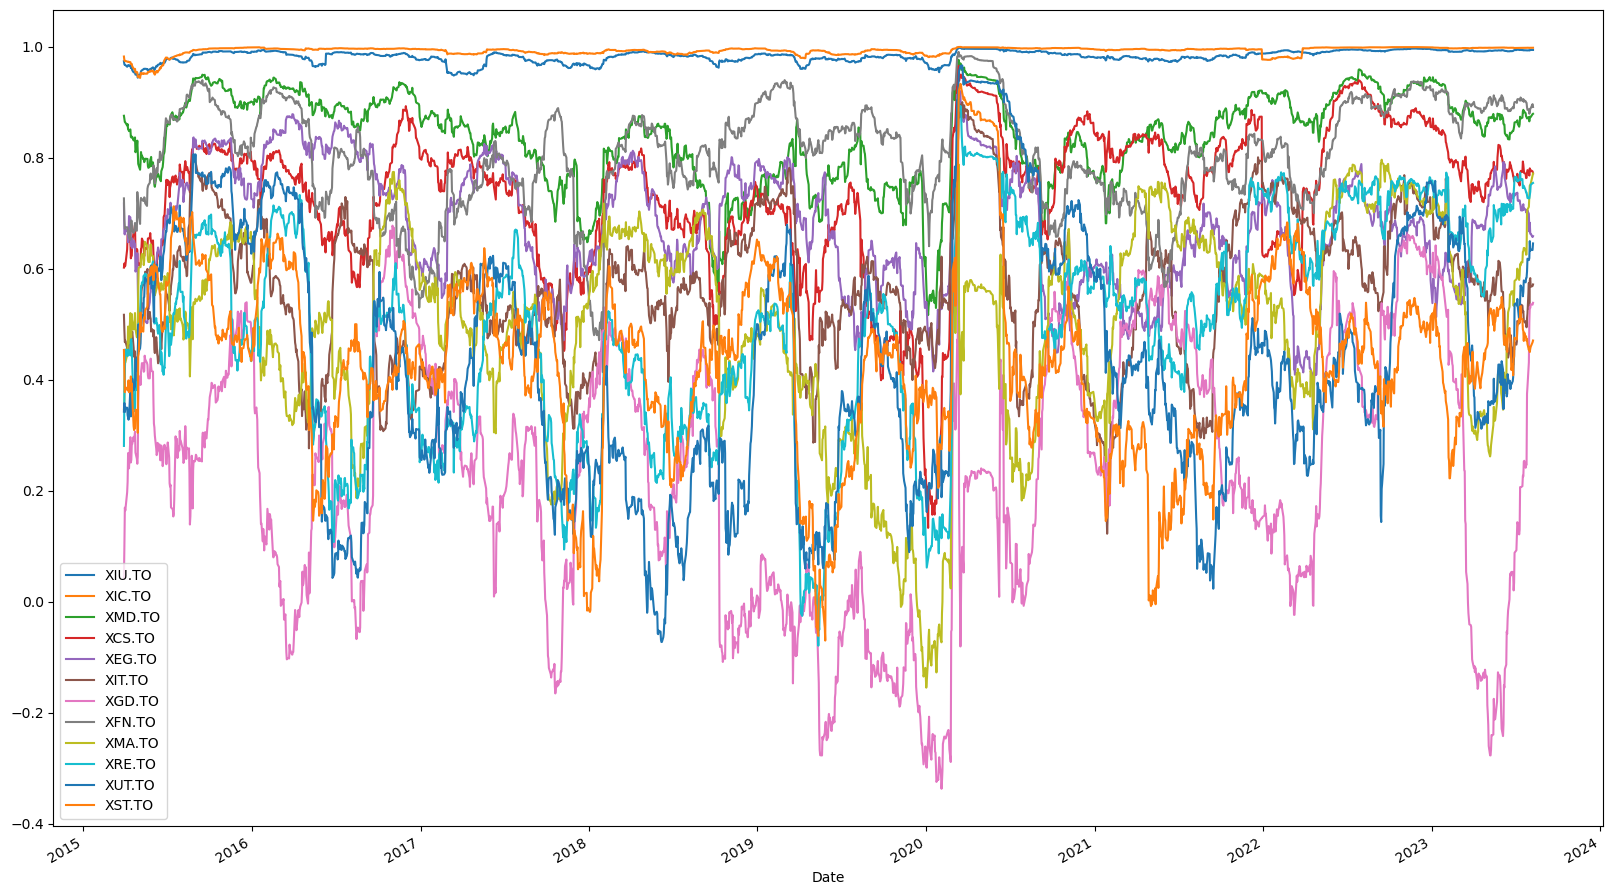

In [206]:
# main takeaway is that during a critical event like covid, all sectors start heading towards correlation of 1 with TSX
roll_corr.unstack()['^GSPTSE'][['XIU.TO', 'XIC.TO', 'XMD.TO', 'XCS.TO', 'XEG.TO', 'XIT.TO', 'XGD.TO', 'XFN.TO', 'XMA.TO'\
           , 'XRE.TO', 'XUT.TO', 'XST.TO']].plot(figsize=(20,12))
# plot hline at 0 and hline at 1
# annotate covid period and top 2 etf's that closely follow tsx
# 2 main points: 1) correlations change all the time, except the top 2. So if want something that follows index, choose 1 of 2
# and choose the one with highest sharpe/returns. 2) when critical event like covid happens, all sectors start heading towards
# 1 with TSX, meaning the whole market is going the same direction when the market crashes

<AxesSubplot:xlabel='Date'>

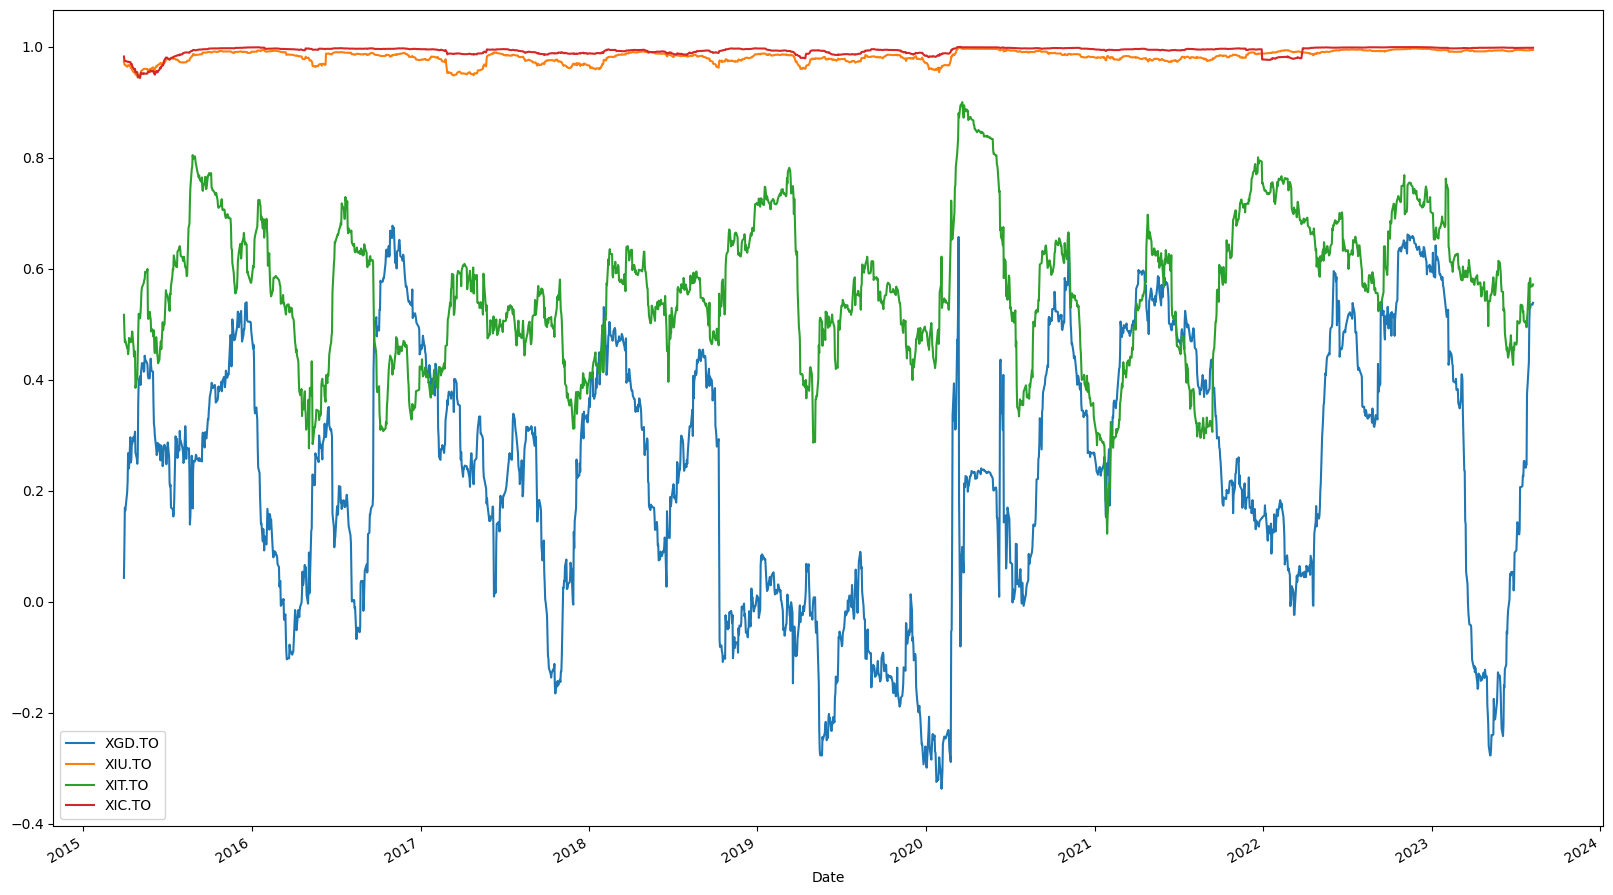

In [210]:
# Point of this is that correlations of all sectors change depending on time, but when there is acritical event like covid,
# they all start heading towards 1, even gold companies.
# Can highlight a few sectors if you want
# Main difference between XIU and XIC is number of holdings. XIU has 60 holdings while XIC has 227 (as of Aug. 8, 2023)
roll_corr.unstack()['^GSPTSE'][['XGD.TO', 'XIU.TO', 'XIT.TO', 'XIC.TO']].plot(figsize=(20,12))

In [ ]:
# Can diversify with XGD. XIT is the best. XIU beats XIC, so stick with XIU. XST not bad.